In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import logging
from marshaltools import ProgramList
from astropy.time import Time
import astropy.units as u
import os

from Observatory import Observatory
from utils import get_config, plot_visibility, prepare_snifs_schedule

In [2]:
# If you are running this notebook for the first time, you will be prompted to enter your username and
# the path to your downloads from slack. If you entered something incorrectly, you can correct this in .config
config = get_config()

username = config['username']
date = '2018-10-01'
obs = 'uh88'
tshift = {'ntt': -0.25*u.day, 'uh88': 0*u.day}
trange = [Time(date)+tshift[obs], Time(date)+u.day+tshift[obs]]

logpath = 'logs/'

# log
logger = logging.getLogger(username)
handler = logging.FileHandler(os.path.join(logpath, 'ztfcosmo_visibilty_%s_%s_%s.log'%(obs,date,username)))
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [3]:
observatories ={
    'uh88': Observatory('uh88', 19.8231, -155.47, 4205, sun_alt_th=-17, logger=logger),
    'ntt': Observatory('ntt', -29.25, -70.73, 2375, sun_alt_th=-12, logger=logger), # What's the twilight limit for ePESSTO?
}

INFO:ufeindt:Initialized Observatory uh88 at position (lon 19.82 deg, lat -155.47 deg, alt: 4205.0 m)
INFO:ufeindt:Initialized Observatory ntt at position (lon -29.25 deg, lat -70.73 deg, alt: 2375.0 m)


In [4]:
pl = ProgramList('AMPEL Test')

targets = json.load(open('sne_following.json'))

INFO:marshaltools.ProgramList:Initialized ProgramList for program AMPEL Test (ID 10)
INFO:marshaltools.ProgramList:Loaded 213 saved sources for program AMPEL Test.


In [5]:
# Calculate dark time and observation windows

dark_time = observatories[obs].get_dark_times(trange)

obs_windows = {}
for snname in targets.keys():
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    logger.info('Calculating visibility of source %s (ra: %f, dec: %f) with %s.'%(snname, ra, dec, obs))
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:Calculating visibility of source ZTF18abcqvhs (ra: 301.674905, dec: 37.783455) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 301.674905, dec: 37.783455) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 5.167 hours. Took 5.99e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abnujuy (ra: 330.124841, dec: 43.553731) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 330.124841, dec: 43.553731) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 8.250 hours. Took 6.12e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18aburkuo (ra: 322.388385, dec: 24.898952) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 322.388385, dec: 24.898952) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 6.417 hours. Took 6.08e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abuksxd (ra: 308.058962, dec: 23.377840) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 308.058962, dec: 23.377840) from observator

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 3.083 hours. Took 6.14e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abxdkny (ra: 284.045885, dec: 78.865301) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 284.045885, dec: 78.865301) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 2.167 hours. Took 6.35e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abwlpzf (ra: 273.898651, dec: 34.761001) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 273.898651, dec: 34.761001) from observator

INFO:ufeindt:source is visible for a total of 3.583 hours. Took 7.53e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abvrzqj (ra: 17.330200, dec: -15.594812) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 17.330200, dec: -15.594812) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 6.917 hours. Took 6.72e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abwbtco (ra: 50.870613, dec: 25.570822) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 50.870613, dec: 25.570822) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
			

In [6]:
additional_names = ['ZTF18abvxqtp']
for snname in additional_names:
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    logger.info('Calculating visibility of source %s (ra: %f, dec: %f) with %s.'%(snname, ra, dec, obs))
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:ufeindt:Calculating visibility of source ZTF18abvxqtp (ra: 359.370147, dec: -6.603815) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 359.370147, dec: -6.603815) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-01 00:00:00.000 and 2018-10-01 23:55:00.000. Total of 9.75 hours of dark
INFO:ufeindt:source is visible for a total of 7.583 hours. Took 6.33e-01 sec


In [7]:
print('%i of %i targets are observable with %s.'%(len(obs_windows.keys()), len(targets)+len(additional_names), obs))

49 of 54 targets are observable with uh88.


In [20]:
# Manual list of SNe to be exluded because they are already in the queue for SEDM
exclude = []

# Sort the SNe by time of lowest airmass etc
snnames = [k for k in obs_windows.keys() if k not in exclude]

# Sort by end of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][-1])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by start of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][0])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by time of best airmass
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by priority (For now number of "Very Good" by last three scanners, should be refined)
f_sort = lambda a: (3 - len([b for b in targets[a][-3:] if b[0] == 'VeryGood']) if a in targets.keys() else 4)
snnames = sorted(snnames, key=f_sort)
priorities = [f_sort(a) for a in snnames]

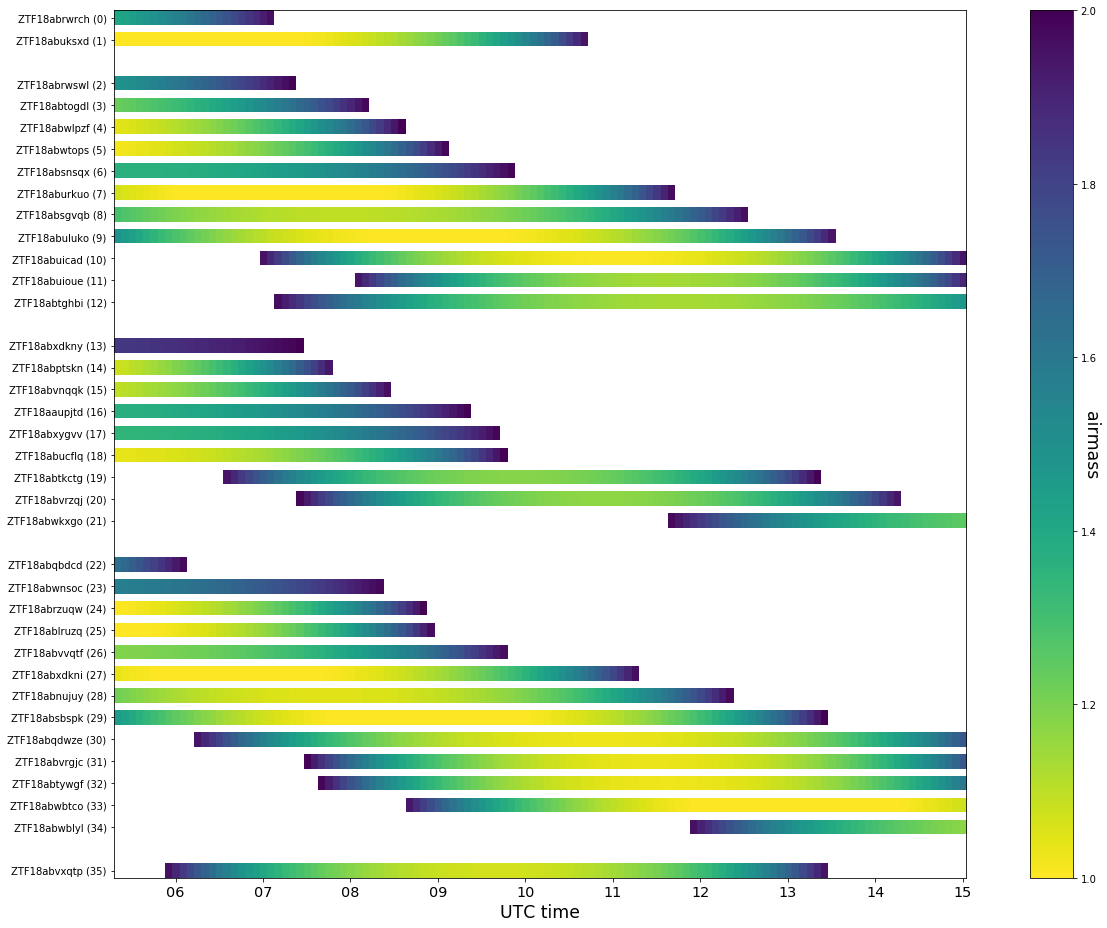

In [21]:
_ = plot_visibility(snnames, obs_windows, dark_time, priorities)

13 SNe selected


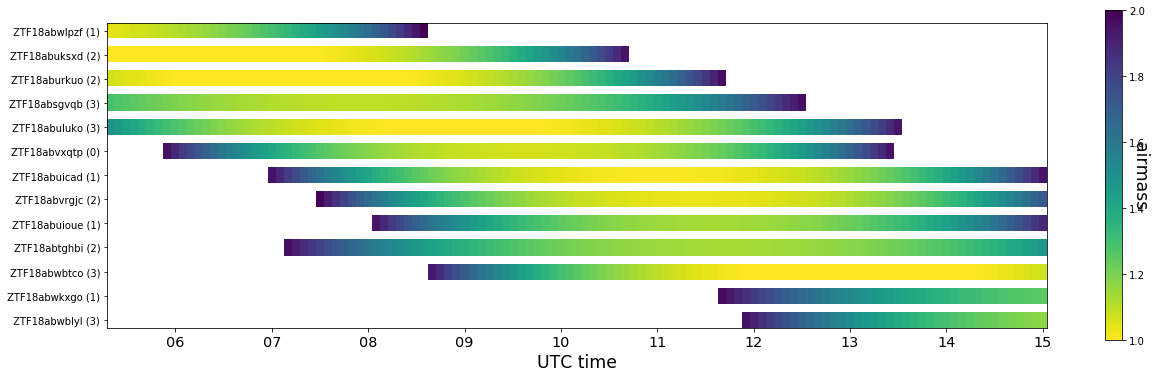

In [22]:
selected = []
# Set manual priorities if you wish
prio_new = []
print('%i SNe selected'%len(selected))

snnames_selected = [snnames[k] for k in selected]
priorities_selected = [priorities[k] for k in selected]

sort_again = True
if sort_again:
    # sort them by time of lowest airmass again
    f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
    if len(prio_new) < len(selected):
        tmp = sorted(zip(snnames_selected, priorities_selected) , key=lambda a: f_sort(a[0]))
    else:
        tmp = sorted(zip(snnames_selected, prio_new) , key=lambda a: f_sort(a[0]))
    snnames_selected = [a[0] for a in tmp]
    priorities_selected = [a[1] for a in tmp]

_ = plot_visibility(snnames_selected, obs_windows, dark_time, priorities_selected, labeltype='priority')
plt.savefig('snifs/targets_snifs_%s.png'%date)

In [25]:
# SANITY CHECK!
# For the beginning it might be good to double check the selected targets on the marshal.
for k in selected:
    print('Please double check whether target %i (%s, priority %i) is a good target:'%(k, snnames[k], priorities[k]))
    print('http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=%s'%snnames[k])

Please double check whether target 35 (ZTF18abvxqtp, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abvxqtp
Please double check whether target 1 (ZTF18abuksxd, priority 0) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abuksxd
Please double check whether target 4 (ZTF18abwlpzf, priority 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abwlpzf
Please double check whether target 7 (ZTF18aburkuo, priority 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18aburkuo
Please double check whether target 8 (ZTF18absgvqb, priority 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18absgvqb
Please double check whether target 9 (ZTF18abuluko, priority 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abuluko
Please double check w

In [26]:
if obs == 'uh88':
    snnames_out = [snnames[k] for k, p in sorted(zip(selected, prio_new), key=lambda a: a[1])]
    prepare_snifs_schedule(snnames_out, pl.sources, obs_windows, date, logger=logger)